In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras import regularizers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_curve, auc
from tensorflow.keras.utils import plot_model
from keras.utils import to_categorical

In [ ]:
def load_data():
  train_data = pd.read_csv('../pretprocesiranje/train_data.csv')
  test_data = pd.read_csv('../pretprocesiranje/test_data.csv')
  X_train = train_data.iloc[:, :-1].copy()
  y_train = train_data.iloc[:, -1:].copy()
  X_test = test_data.iloc[:, :-1].copy()
  y_test = test_data.iloc[:, -1:].copy()

  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

  X_train = np.array(X_train)
  y_train = np.array(y_train)
  X_val = np.array(X_val)
  y_val = np.array(y_val)
  X_test = np.array(X_test)
  y_test = np.array(y_test)

  return X_train, X_val, y_train, y_val, X_test, y_test

In [ ]:
def create_and_describe(inputs, outputs):
  model = Model(inputs=inputs, outputs=outputs)

  # ovi parametri ostaju isti
  model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
  )

  model.summary()

  return model

In [ ]:
def model_fit(X_train, y_train, X_test, y_test, batch_size, epochs, model):

  losses = []
  accuracies = []
  val_losses = []
  val_accuracies = []

  history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
  )
  losses.extend(history.history['loss'])
  accuracies.extend(history.history['accuracy'])
  val_losses.extend(history.history['val_loss'])
  val_accuracies.extend(history.history['val_accuracy'])

  return losses, accuracies, val_losses, val_accuracies

In [ ]:
def plot_metrics(losses, accuracies, val_losses, val_accuracies):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

  #losses
  ax1.plot(losses, label='Training Loss')
  ax1.plot(val_losses, label='Validation Loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.set_title('Training and Validation Loss')
  ax1.legend()

  #accuracies
  ax2.plot(accuracies, label='Training Accuracy')
  ax2.plot(val_accuracies, label='Validation Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.set_title('Training and Validation Accuracy')
  ax2.legend()

  plt.tight_layout()
  plt.show()

In [ ]:
def baseline_model(size, batch_size, epochs):
  input_dim = X_train.shape[1]
  inputs = Input(shape=(input_dim,), name="komentari")
  x = Dense(size, activation='relu', name="prvi_sloj")(inputs)
  outputs = Dense(3, activation='softmax', name="predikcije")(x)

  baseline_model = create_and_describe(inputs=inputs, outputs=outputs)

  losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_test, y_test, batch_size=batch_size, epochs=epochs, model=baseline_model)

  all_losses.append(losses)
  all_accuracies.append(accuracies)
  all_val_losses.append(val_losses)
  all_val_accuracies.append(val_accuracies)

In [ ]:
def plot_batch():
  plt.figure(figsize=(10, 8))

  batch_sizes = [32, 64, 128]
  # training loss
  plt.subplot(2, 2, 1)
  for i in range(len(batch_sizes)):
      plt.plot(all_losses[i], label=f'Training - Batch Size: {batch_sizes[i]}')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training Loss')

  # training accuracy
  plt.subplot(2, 2, 2)
  for i in range(len(batch_sizes)):
      plt.plot(all_accuracies[i], label=f'Training - Batch Size: {batch_sizes[i]}')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')
  plt.legend()

  # validation loss
  plt.subplot(2, 2, 3)
  for i in range(len(batch_sizes)):
      plt.plot(all_val_losses[i], label=f'Validation - Batch Size: {batch_sizes[i]}')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Validation Loss')
  plt.legend()

  # validation accuracy
  plt.subplot(2, 2, 4)
  for i in range(len(batch_sizes)):
      plt.plot(all_val_accuracies[i], label=f'Validation - Batch Size: {batch_sizes[i]}')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Validation Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()

In [ ]:
X_train, X_val, y_train, y_val, X_test, y_test = load_data()

In [ ]:
compare_loss = []
compare_val_loss = []
compare_accuracy = []
compare_val_accuracy = []

#**Multilayer Perceptron**

#Baseline Model i izbor batch size hiperparametra

In [ ]:
all_losses = []
all_accuracies = []
all_val_losses = []
all_val_accuracies = []

In [ ]:
baseline_model(size=64, batch_size=32, epochs=10)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 64)                512064    
                                                                 
 predikcije (Dense)          (None, 3)                 195       
                                                                 
Total params: 512,259
Trainable params: 512,259
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
213/213 [==============================] - 4s 17ms/step - loss: 0.9815 - accuracy: 0.5504 - val_loss: 0.7918 - val_accuracy: 0.6973
Epoch 2/10
213/213 [==============================] - 2s 9ms/step - loss: 0.5978 - accuracy: 0.7892 - val_loss: 0.6273 - val_accuracy: 0.7279
Epoch 3/10
213/213 [==============

In [ ]:
baseline_model(size=64, batch_size=64, epochs=10)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 64)                512064    
                                                                 
 predikcije (Dense)          (None, 3)                 195       
                                                                 
Total params: 512,259
Trainable params: 512,259
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
107/107 [==============================] - 3s 22ms/step - loss: 1.0300 - accuracy: 0.5047 - val_loss: 0.9169 - val_accuracy: 0.6472
Epoch 2/10
107/107 [==============================] - 2s 17ms/step - loss: 0.7496 - accuracy: 0.7551 - val_loss: 0.7023 - val_accuracy: 0.7291
Epoch 3/10
107/107 [===========

In [ ]:
baseline_model(size=64, batch_size=128, epochs=10)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 64)                512064    
                                                                 
 predikcije (Dense)          (None, 3)                 195       
                                                                 
Total params: 512,259
Trainable params: 512,259
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
54/54 [==============================] - 2s 20ms/step - loss: 1.0517 - accuracy: 0.4396 - val_loss: 0.9858 - val_accuracy: 0.5177
Epoch 2/10
54/54 [==============================] - 1s 17ms/step - loss: 0.8796 - accuracy: 0.6607 - val_loss: 0.8295 - val_accuracy: 0.6832
Epoch 3/10
54/54 [=================

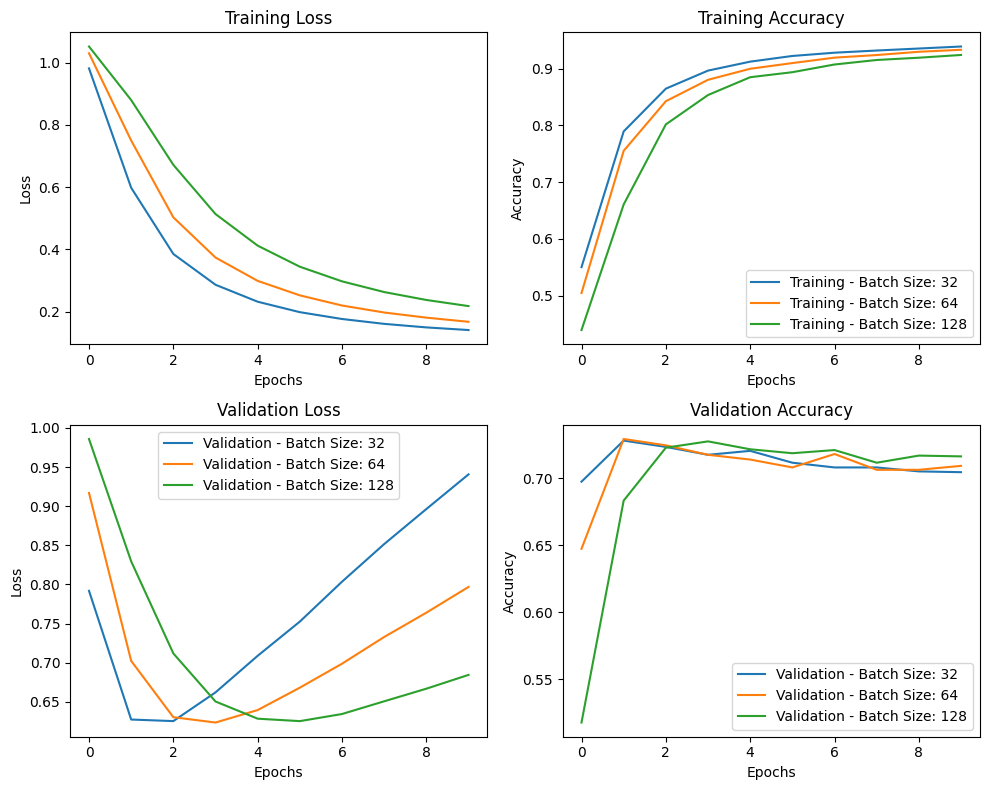

In [ ]:
plot_batch()

overfit svuda, najbolje za 128: najsporije raste loss i najmanja je razlika izmedju tacnosti na trening i validacionom skupu

In [ ]:
compare_loss.append(all_losses[1][-1])
compare_val_loss.append(all_val_losses[1][-1])
compare_accuracy.append(all_accuracies[1][-1])
compare_val_accuracy.append(all_val_accuracies[1][-1])

#Regularizacija smanjenjem broja neurona

In [ ]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(32, activation='relu', name="prvi_sloj")(inputs)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

reg_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 32)                256032    
                                                                 
 predikcije (Dense)          (None, 3)                 99        
                                                                 
Total params: 256,131
Trainable params: 256,131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=128, epochs=10, model=reg_model)

Epoch 1/10
54/54 [==============================] - 2s 17ms/step - loss: 1.0717 - accuracy: 0.4856 - val_loss: 1.0285 - val_accuracy: 0.5530
Epoch 2/10
54/54 [==============================] - 1s 12ms/step - loss: 0.9608 - accuracy: 0.6224 - val_loss: 0.9203 - val_accuracy: 0.6237
Epoch 3/10
54/54 [==============================] - 1s 11ms/step - loss: 0.8121 - accuracy: 0.7281 - val_loss: 0.8159 - val_accuracy: 0.6779
Epoch 4/10
54/54 [==============================] - 1s 11ms/step - loss: 0.6710 - accuracy: 0.8018 - val_loss: 0.7347 - val_accuracy: 0.7256
Epoch 5/10
54/54 [==============================] - 1s 12ms/step - loss: 0.5583 - accuracy: 0.8445 - val_loss: 0.6838 - val_accuracy: 0.7332
Epoch 6/10
54/54 [==============================] - 1s 11ms/step - loss: 0.4723 - accuracy: 0.8694 - val_loss: 0.6519 - val_accuracy: 0.7297
Epoch 7/10
54/54 [==============================] - 1s 12ms/step - loss: 0.4084 - accuracy: 0.8806 - val_loss: 0.6358 - val_accuracy: 0.7232
Epoch 8/10
54

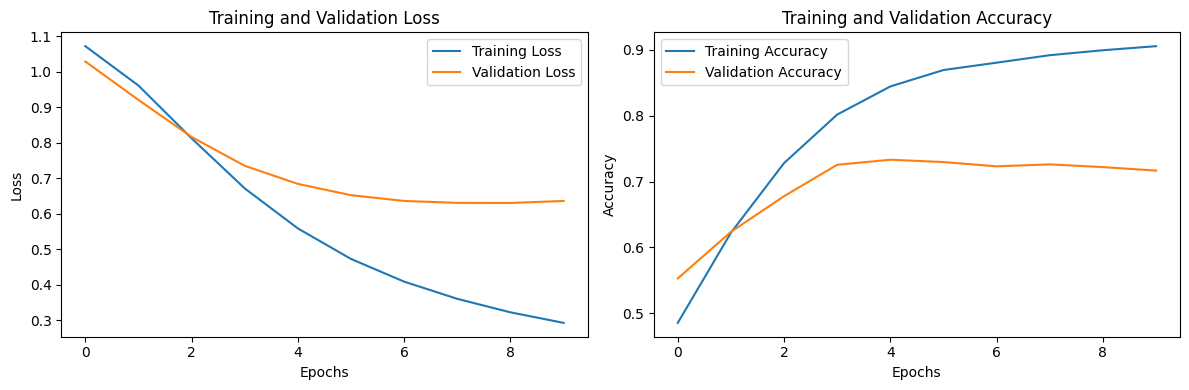

In [ ]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

In [ ]:
compare_loss.append(losses[-1])
compare_val_loss.append(val_losses[-1])
compare_accuracy.append(accuracies[-1])
compare_val_accuracy.append(val_accuracies[-1])

#Deep network

(ilustrativno, da se uverimo da ne treba jos kompleksniji model od pocetnog)

In [ ]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(64, activation='relu', name="prvi_sloj")(inputs)
x = Dense(32, activation='relu', name="drugi_sloj")(x)
x = Dense(32, activation='relu', name="treci_sloj")(x)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

dp_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 64)                512064    
                                                                 
 drugi_sloj (Dense)          (None, 32)                2080      
                                                                 
 treci_sloj (Dense)          (None, 32)                1056      
                                                                 
 predikcije (Dense)          (None, 3)                 99        
                                                                 
Total params: 515,299
Trainable params: 515,299
Non-trainable params: 0
_________________________________________________________________


In [ ]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=128, epochs=10, model=dp_model)

Epoch 1/10
54/54 [==============================] - 3s 31ms/step - loss: 1.0522 - accuracy: 0.4209 - val_loss: 0.9600 - val_accuracy: 0.4770
Epoch 2/10
54/54 [==============================] - 1s 18ms/step - loss: 0.7946 - accuracy: 0.6297 - val_loss: 0.7380 - val_accuracy: 0.7179
Epoch 3/10
54/54 [==============================] - 1s 17ms/step - loss: 0.4459 - accuracy: 0.8539 - val_loss: 0.6960 - val_accuracy: 0.7191
Epoch 4/10
54/54 [==============================] - 1s 18ms/step - loss: 0.2585 - accuracy: 0.9007 - val_loss: 0.7819 - val_accuracy: 0.7179
Epoch 5/10
54/54 [==============================] - 1s 18ms/step - loss: 0.1952 - accuracy: 0.9228 - val_loss: 0.9076 - val_accuracy: 0.7049
Epoch 6/10
54/54 [==============================] - 1s 16ms/step - loss: 0.1617 - accuracy: 0.9300 - val_loss: 0.9597 - val_accuracy: 0.7150
Epoch 7/10
54/54 [==============================] - 1s 18ms/step - loss: 0.1485 - accuracy: 0.9324 - val_loss: 0.9884 - val_accuracy: 0.7067
Epoch 8/10
54

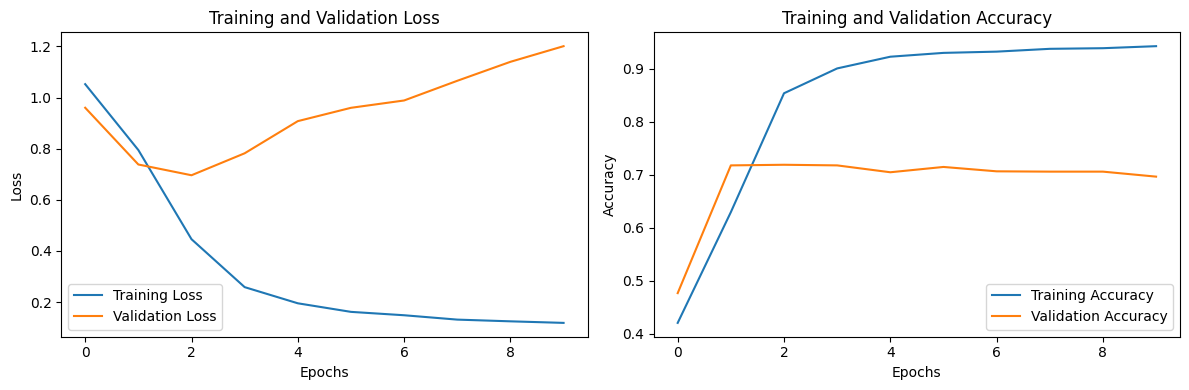

In [ ]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

In [ ]:
compare_loss.append(losses[-1])
compare_val_loss.append(val_losses[-1])
compare_accuracy.append(accuracies[-1])
compare_val_accuracy.append(val_accuracies[-1])

#L2 regularizacija

ravnomernije rasporedjivanje tezina po granama


In [ ]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(64, activation='relu', name="prvi_sloj", kernel_regularizer=regularizers.l2(0.01))(inputs)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

l2_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 64)                512064    
                                                                 
 predikcije (Dense)          (None, 3)                 195       
                                                                 
Total params: 512,259
Trainable params: 512,259
Non-trainable params: 0
_________________________________________________________________


In [ ]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=128, epochs=10, model=l2_model)

Epoch 1/10
54/54 [==============================] - 3s 34ms/step - loss: 1.2766 - accuracy: 0.4141 - val_loss: 1.0711 - val_accuracy: 0.4181
Epoch 2/10
54/54 [==============================] - 1s 18ms/step - loss: 1.0678 - accuracy: 0.4212 - val_loss: 1.0639 - val_accuracy: 0.4287
Epoch 3/10
54/54 [==============================] - 1s 17ms/step - loss: 1.0626 - accuracy: 0.4434 - val_loss: 1.0594 - val_accuracy: 0.4823
Epoch 4/10
54/54 [==============================] - 1s 17ms/step - loss: 1.0575 - accuracy: 0.4764 - val_loss: 1.0533 - val_accuracy: 0.4859
Epoch 5/10
54/54 [==============================] - 1s 18ms/step - loss: 1.0511 - accuracy: 0.5010 - val_loss: 1.0475 - val_accuracy: 0.5271
Epoch 6/10
54/54 [==============================] - 1s 18ms/step - loss: 1.0429 - accuracy: 0.5487 - val_loss: 1.0405 - val_accuracy: 0.5412
Epoch 7/10
54/54 [==============================] - 1s 18ms/step - loss: 1.0350 - accuracy: 0.5636 - val_loss: 1.0320 - val_accuracy: 0.5501
Epoch 8/10
54

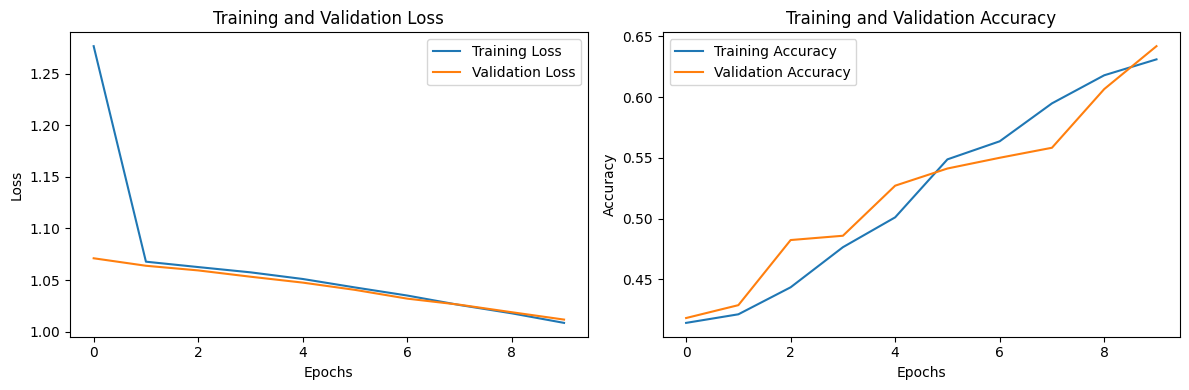

In [ ]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

bolje, mada sad se malo teze snalazi i tacnost nece nastaviti da raste


In [ ]:
compare_loss.append(losses[-1])
compare_val_loss.append(val_losses[-1])
compare_accuracy.append(accuracies[-1])
compare_val_accuracy.append(val_accuracies[-1])

#Dropout regularizacija

izbacivanje 50% nasumicnih neurona u svakoj iteraciji

In [ ]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(64, activation='relu', name="prvi_sloj")(inputs)
x = Dropout(0.5, name="dropout1")(x)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

dropout_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 64)                512064    
                                                                 
 dropout1 (Dropout)          (None, 64)                0         
                                                                 
 predikcije (Dense)          (None, 3)                 195       
                                                                 
Total params: 512,259
Trainable params: 512,259
Non-trainable params: 0
_________________________________________________________________


In [ ]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=128, epochs=10, model=dropout_model)

Epoch 1/10
54/54 [==============================] - 3s 36ms/step - loss: 1.0705 - accuracy: 0.4287 - val_loss: 1.0295 - val_accuracy: 0.4482
Epoch 2/10
54/54 [==============================] - 1s 27ms/step - loss: 0.9627 - accuracy: 0.5742 - val_loss: 0.9125 - val_accuracy: 0.6472
Epoch 3/10
54/54 [==============================] - 1s 18ms/step - loss: 0.8075 - accuracy: 0.7280 - val_loss: 0.7909 - val_accuracy: 0.7073
Epoch 4/10
54/54 [==============================] - 1s 17ms/step - loss: 0.6578 - accuracy: 0.7951 - val_loss: 0.7081 - val_accuracy: 0.7220
Epoch 5/10
54/54 [==============================] - 1s 17ms/step - loss: 0.5514 - accuracy: 0.8240 - val_loss: 0.6597 - val_accuracy: 0.7314
Epoch 6/10
54/54 [==============================] - 1s 18ms/step - loss: 0.4726 - accuracy: 0.8470 - val_loss: 0.6348 - val_accuracy: 0.7326
Epoch 7/10
54/54 [==============================] - 1s 16ms/step - loss: 0.4087 - accuracy: 0.8747 - val_loss: 0.6240 - val_accuracy: 0.7238
Epoch 8/10
54

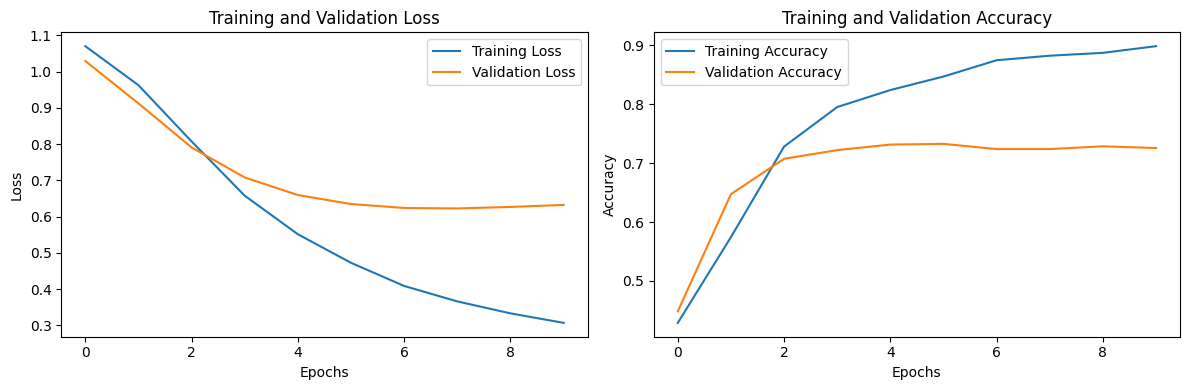

In [ ]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

In [ ]:
compare_loss.append(losses[-1])
compare_val_loss.append(val_losses[-1])
compare_accuracy.append(accuracies[-1])
compare_val_accuracy.append(val_accuracies[-1])

#L2 + Dropout

In [ ]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(64, activation='relu', name="prvi_sloj", kernel_regularizer=regularizers.l2(0.01))(inputs)
x = Dropout(0.5, name="dropout1")(x)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

reg_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 64)                512064    
                                                                 
 dropout1 (Dropout)          (None, 64)                0         
                                                                 
 predikcije (Dense)          (None, 3)                 195       
                                                                 
Total params: 512,259
Trainable params: 512,259
Non-trainable params: 0
_________________________________________________________________


In [ ]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=128, epochs=10, model=reg_model)

Epoch 1/10
54/54 [==============================] - 2s 22ms/step - loss: 1.2790 - accuracy: 0.4141 - val_loss: 1.0742 - val_accuracy: 0.4181
Epoch 2/10
54/54 [==============================] - 1s 18ms/step - loss: 1.0720 - accuracy: 0.4243 - val_loss: 1.0693 - val_accuracy: 0.4311
Epoch 3/10
54/54 [==============================] - 1s 17ms/step - loss: 1.0685 - accuracy: 0.4486 - val_loss: 1.0656 - val_accuracy: 0.4488
Epoch 4/10
54/54 [==============================] - 1s 23ms/step - loss: 1.0650 - accuracy: 0.4732 - val_loss: 1.0634 - val_accuracy: 0.4812
Epoch 5/10
54/54 [==============================] - 2s 28ms/step - loss: 1.0606 - accuracy: 0.4997 - val_loss: 1.0584 - val_accuracy: 0.5041
Epoch 6/10
54/54 [==============================] - 2s 28ms/step - loss: 1.0562 - accuracy: 0.5408 - val_loss: 1.0546 - val_accuracy: 0.5324
Epoch 7/10
54/54 [==============================] - 2s 30ms/step - loss: 1.0491 - accuracy: 0.5595 - val_loss: 1.0500 - val_accuracy: 0.5860
Epoch 8/10
54

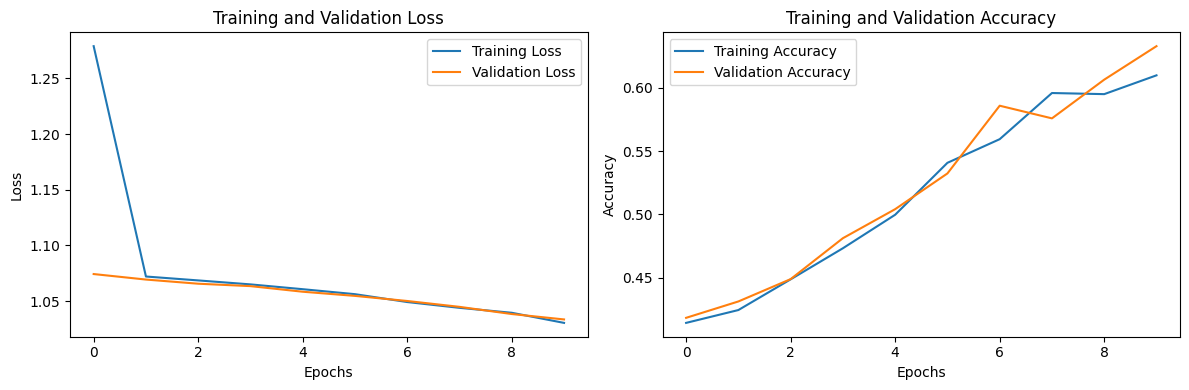

In [ ]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

In [ ]:
compare_loss.append(losses[-1])
compare_val_loss.append(val_losses[-1])
compare_accuracy.append(accuracies[-1])
compare_val_accuracy.append(val_accuracies[-1])

<Figure size 800x600 with 0 Axes>

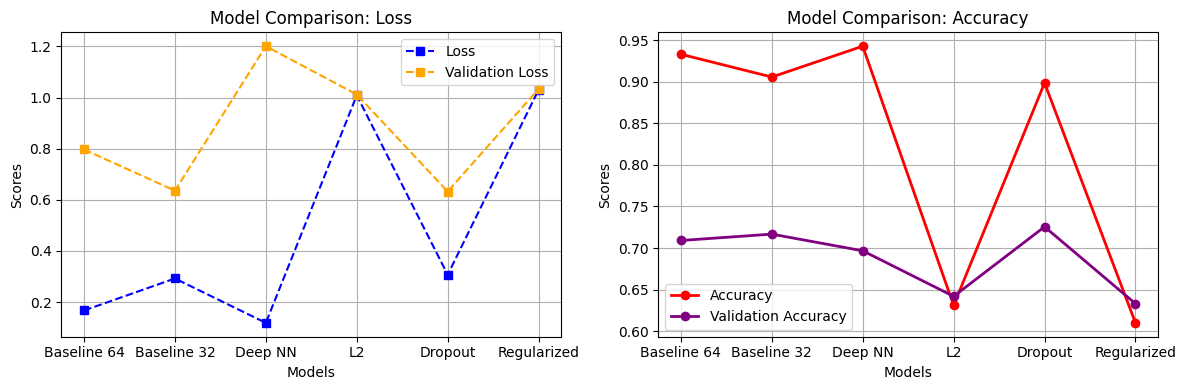

In [ ]:
model_names = ['Baseline 64', 'Baseline 32', 'Deep NN', 'L2', 'Dropout', 'Regularized']
plt.figure(figsize=(8, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(model_names, compare_loss, marker='s', linestyle='--', color='blue', label='Loss')
ax1.plot(model_names, compare_val_loss, marker='s', linestyle='--', color='orange', label='Validation Loss')
ax1.set_xlabel('Models')
ax1.set_ylabel('Scores')
ax1.set_title('Model Comparison: Loss')
ax1.legend()
ax1.grid(True)


ax2.plot(model_names, compare_accuracy, marker='o', linestyle='-', linewidth=2, color='red', label='Accuracy')
ax2.plot(model_names, compare_val_accuracy, marker='o', linestyle='-', linewidth=2, color='purple', label='Validation Accuracy')
ax2.set_xlabel('Models')
ax2.set_ylabel('Scores')
ax2.set_title('Model Comparison: Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()

plt.show()

-------------------najbolja arhitektura-------------------

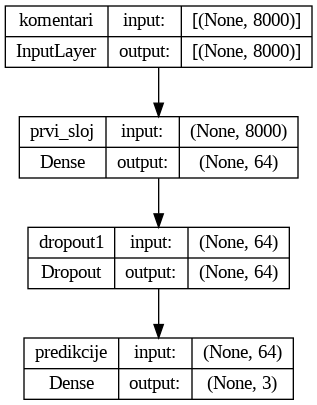

In [ ]:
plot_model(dropout_model,show_shapes=True)

#Test skup

dropout + smanjenje broja neurona

In [ ]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="komentari")
x = Dense(20, activation='relu', name="prvi_sloj")(inputs)
x = Dropout(0.5)(x)
outputs = Dense(3, activation='softmax', name="predikcije")(x)

final_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 komentari (InputLayer)      [(None, 8000)]            0         
                                                                 
 prvi_sloj (Dense)           (None, 20)                160020    
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 predikcije (Dense)          (None, 3)                 63        
                                                                 
Total params: 160,083
Trainable params: 160,083
Non-trainable params: 0
_________________________________________________________________


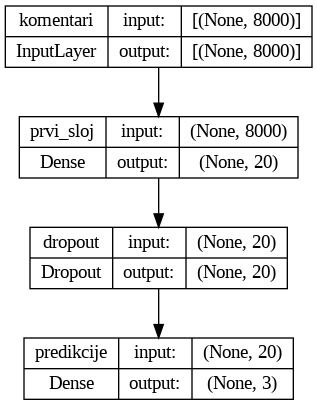

In [ ]:
plot_model(final_model,show_shapes=True)

In [ ]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=128, epochs=10, model=final_model)

Epoch 1/10
54/54 [==============================] - 1s 16ms/step - loss: 1.0841 - accuracy: 0.4256 - val_loss: 1.0646 - val_accuracy: 0.4276
Epoch 2/10
54/54 [==============================] - 1s 11ms/step - loss: 1.0351 - accuracy: 0.5196 - val_loss: 1.0076 - val_accuracy: 0.5760
Epoch 3/10
54/54 [==============================] - 1s 11ms/step - loss: 0.9596 - accuracy: 0.6292 - val_loss: 0.9357 - val_accuracy: 0.6696
Epoch 4/10
54/54 [==============================] - 1s 11ms/step - loss: 0.8648 - accuracy: 0.7090 - val_loss: 0.8633 - val_accuracy: 0.7091
Epoch 5/10
54/54 [==============================] - 1s 13ms/step - loss: 0.7779 - accuracy: 0.7527 - val_loss: 0.8005 - val_accuracy: 0.7179
Epoch 6/10
54/54 [==============================] - 1s 11ms/step - loss: 0.7044 - accuracy: 0.7735 - val_loss: 0.7504 - val_accuracy: 0.7244
Epoch 7/10
54/54 [==============================] - 1s 11ms/step - loss: 0.6351 - accuracy: 0.7996 - val_loss: 0.7131 - val_accuracy: 0.7309
Epoch 8/10
54

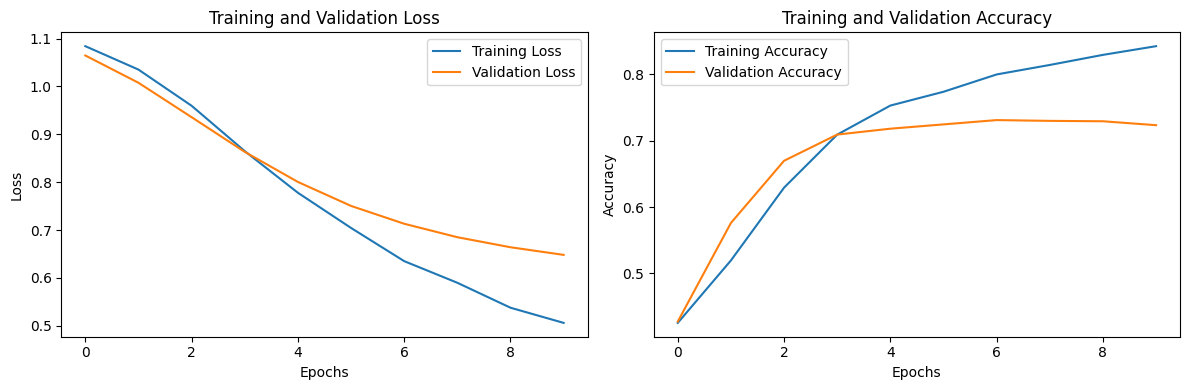

In [ ]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

In [ ]:
test_scores = final_model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

50/50 - 0s - loss: 0.4676 - accuracy: 0.8436 - 119ms/epoch - 2ms/step
Test loss: 0.46760210394859314
Test accuracy: 0.8436318039894104


In [ ]:
final_model.save('nn_model.h5')